In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np
from typing import Counter


In [19]:
data = pd.read_csv('fix-data.csv')
tweets = data['text_normalized']

In [20]:
# Vektorisasi isi tweet menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2)
X = vectorizer.fit_transform(tweets)

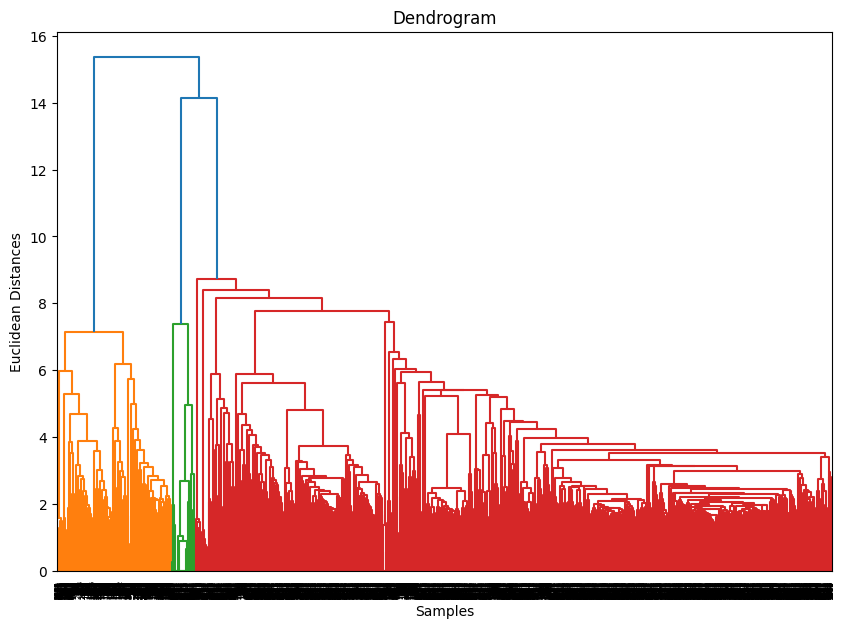

In [21]:
# Membuat Dendrogram untuk melihat potensi jumlah klaster
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X.toarray(), method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.show()

In [10]:
# Reduksi Dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


In [11]:
# Menggunakan Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(X_pca)

In [12]:
# Hitung jumlah data di setiap kluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print(f"Jumlah data per kluster:\n{cluster_counts}")

Jumlah data per kluster:
{np.int64(0): np.int64(4674), np.int64(1): np.int64(843), np.int64(2): np.int64(179)}


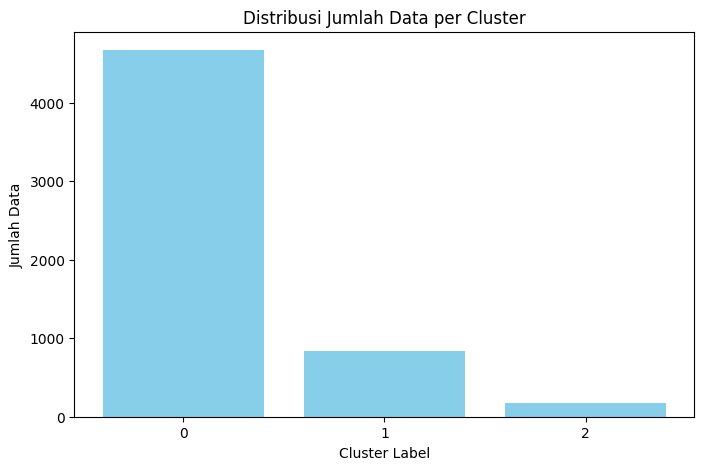

In [13]:
# Visualisasi jumlah data dalam bentuk diagram batang
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.keys(), cluster_counts.values(), color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Cluster')
plt.xticks(list(cluster_counts.keys()))
plt.show()

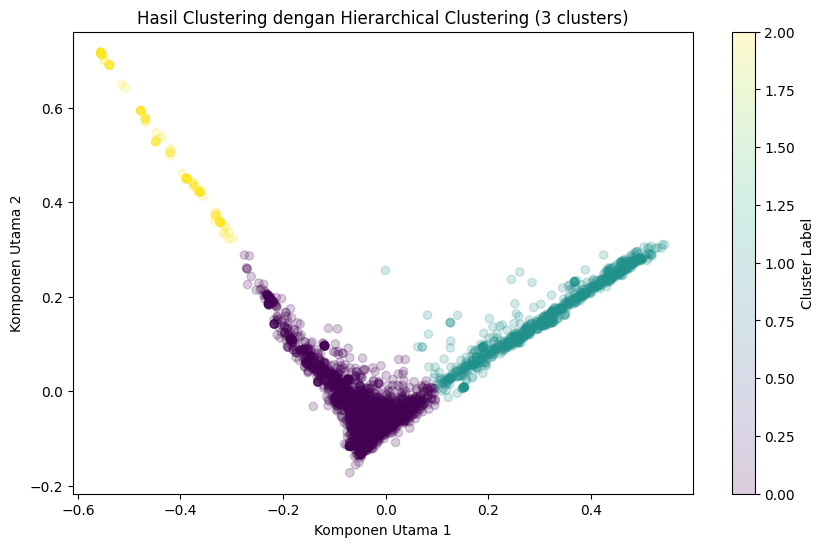

In [14]:
num_clusters = len(set(labels))

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.2)
plt.colorbar(label='Cluster Label')
plt.title(f'Hasil Clustering dengan Hierarchical Clustering ({num_clusters} clusters)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()


In [15]:
# Menghitung silhouette score
silhouette_avg = silhouette_score(X_pca, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.7665009913245975


In [16]:
# Menampilkan isi tweet untuk diperbandingkan dengan nilai cluster per tweet
data['cluster'] = labels 
print(data[['text_normalized','cluster']].head())

                                     text_normalized  cluster
0  flash sale cek harga link pembelian okey link ...        0
1  osewood hi kak makasih ya udah dm aku mohon ke...        1
2  taesannuna hi kak makasih ya udah dm aku mohon...        1
3  haerinahceh hi kak maaf buat kendala kakak ter...        1
4  kcadita aerilates shopeepay id hi kak maaf ya ...        1


In [17]:
for i in range(num_clusters): 
    cluster_words = []

    # Mengumpulkan semua teks dalam cluster i
    for j in range(len(labels)):
        if labels[j] == i:
            cluster_words.extend(tweets[j].split())

    # Menghitung frekuensi kata dalam cluster
    word_counts = Counter(cluster_words)
    
    # Mengambil 10 kata teratas berdasarkan frekuensi
    top_words = word_counts.most_common(10)
    top_words_list = [word for word, count in top_words]

    print(f"Top words for cluster {i}: \n{top_words_list}\n")

Top words for cluster 0: 
['shopee', 'review', 'sekarang', 'ada', 'aku', 'belanja', 'cek', 'harga', 'rp', 'dapatkan']

Top words for cluster 1: 
['kak', 'ya', 'dm', 'aku', 'kendala', 'maaf', 'shopee', 'terkait', 'infoin', 'kakak']

Top words for cluster 2: 
['voucher', 'diskon', 'k', 'sale', 'shopee', 'disc', 'flash', 'rekomendasi', 'info', 'kode']

